In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders2/*士紙*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders2\\2013士紙致股東.txt',
 './letterto shareholders2\\2014士紙致股東.txt',
 './letterto shareholders2\\2015士紙致股東.txt',
 './letterto shareholders2\\2016士紙致股東.txt',
 './letterto shareholders2\\2017士紙致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.168 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 股東 女士 歡迎 股東 出席 本屆 股東會 並對 以往 給予 之 支持 鼓勵 深致 謝 意 謹 就 本 營運 情形 報告 於 後 一 一 國內 白紙板 受國 內外 情勢 不佳 歐債 問題 懸 而 未決 間接 內需 消費 萎縮 紙市 不振 國內 整體 需求 也 難以 外銷 受大陸 產量 供過 於 求 之影響 且 東協區域 貿易 關稅 下 外銷 也 陷入 苦戰 油 電雙漲 及 匯率 導致 利潤 相對 降低 甚至 發生 虧損 本年度 合 併 營業 收入 淨額 新 億 餘萬元 較前 一 減少 新 億 減幅 二 因應國 內外 情勢 之 變化 已進 行廠 內 調整 改善 製 造 流程 有效 執行 抄造 基重 集中化 以加強 執行 降低 抄造 損耗 及 節流 並升級 污點 檢出 提升 品 質 以 降低 生產 成本 並積 極開 發新 商品 銷售 三 一 三 紙業營 運計畫 概要 預估 國際 紙品 情勢 尚 相當 嚴峻 因應 艱困 經營 環境 本公 司採購 部門將 密切 掌握 漿紙 需求 料源 變化 除 力求 固定 生產成 本 降低 管理部 門同時 強化 人員 在 職培訓 以 培育 優良 幹部 淘汰 不 用心 不 適任 人員 以 提升 經營 素質 作 紮 根 深耕 之 亦 將積 極開 發新 商品 銷售 並加強 管控 資本 支出 執行 預算 控制 以 鞏固 經營 利基 進而 創造 更佳 經營績 效 四 轉投 資陽光 股份 有限公司 本年度 營運 情形 次 計畫 概要 一 紙廠 舊廠 多年 來持續 不斷 地 政府 研究 磋商 並 修改 計畫 於 九 十八年 十二月 大致 完成 計畫 實質 審查 工作 但 因 改變 條件 因而 不符 效益 故 未能 及時 政府 於 民國 一 刻正 區通盤 檢討 檢討 程序 據悉 本案 已 被 納入檢 討評 估中 本 將繼續 本持 政府 及 附近 鄰居三贏 之 策略 即 符合 政府 都 市開 發計畫 之 需求 謀取 股東 最大 效益 並 提升 附近 居民 甚至 北 市 百姓 之生 活環境 品質 將負 起責 任持續 不斷 地 俟 機 溝通 協商 希望 盡速 達成 協議 符合 各方 之意願 順利 完成 二 五號 倉庫 開發案 已 於 民國 九十八 獲 府 通過 專案 計畫 並 部分 容積 獎勵 本案 已 辦理 更新 送件 並持續 配合 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1033


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 1033)


<5x1033 sparse matrix of type '<class 'numpy.float64'>'
	with 2007 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
不佳 0.06771959243701237 0 15
不振 0.0546357407809543 0 23
不斷 0.06453749728111122 0 24
並加強 0.06771959243701237 0 30
並升級 0.06771959243701237 0 31
並持續 0.06771959243701237 0 36
並積 0.0546357407809543 0 40
並進行 0.06771959243701237 0 44
並開始 0.0546357407809543 0 46
之影響 0.0546357407809543 0 59
之生 0.06771959243701237 0 62
九十八 0.0546357407809543 0 64
人員 0.09070520059322734 0 75
以加強 0.06771959243701237 0 87
任持續 0.06771959243701237 0 106
估中 0.06771959243701237 0 107
作為 0.06771959243701237 0 114
供過 0.0546357407809543 0 123
優良 0.06771959243701237 0 147
充分 0.06771959243701237 0 149
內外 0.09070520059322734 0 153
內需 0.0546357407809543 0 154
利潤 0.07630407425698904 0 183
創造 0.06453749728111122 0 197
力求 0.06771959243701237 0 199
匯率 0.0546357407809543 0 213
協議 0.0546357407809543 0 222
受國 0.0546357407809543 0 235
受大陸 0.06771959243701237 0 236
司採購 0.06771959243701237 0 243
商品 0.09070520059322734 0 263
問題 0.0546357407809543 0 265
嚴峻 0.0546357407809543 0 267
因應國 0.06771959243701237 0 275
固定 0.0677

情形 0.07084346592320648 3 438
提升 0.11807244320534413 3 476
搶攻 0.07996560972598107 3 483
擴大市 0.07996560972598107 3 487
政策 0.05583983794600331 3 502
方向 0.05583983794600331 3 523
更新 0.0944579545642753 3 543
更開 0.06637867966167764 3 545
最佳 0.06637867966167764 3 547
有限公司 0.0944579545642753 3 559
權益 0.09956801949251645 3 603
法規 0.06637867966167764 3 621
活化 0.05583983794600331 3 624
消費 0.08375975691900496 3 629
消費者 0.09956801949251645 3 632
涉及 0.07996560972598107 3 633
營業 0.1889159091285506 3 664
營運 0.11807244320534413 3 667
獲利 0.05583983794600331 3 675
環境 0.14168693184641296 3 688
申請 0.05583983794600331 3 708
發案 0.09956801949251645 3 718
目標 0.05583983794600331 3 730
社區 0.06637867966167764 3 741
秉持 0.08375975691900496 3 745
穩定 0.06637867966167764 3 756
競爭 0.13275735932335528 3 761
符合 0.07084346592320648 3 764
策略 0.07084346592320648 3 770
紙廠 0.07084346592320648 3 785
經營 0.1889159091285506 3 800
總體 0.05583983794600331 3 812
股份 0.0944579545642753 3 826
股東 0.16530142048748178 3 827
行銷 0.0799656097

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders2\2013士紙致股東.txt,./letterto shareholders2\2014士紙致股東.txt,./letterto shareholders2\2015士紙致股東.txt,./letterto shareholders2\2016士紙致股東.txt,./letterto shareholders2\2017士紙致股東.txt
0,一日,0.000000,0.000000,0.000000,0.039983,0.030393
1,一月,0.000000,0.000000,0.000000,0.049558,0.000000
2,一次,0.000000,0.000000,0.000000,0.049558,0.000000
3,一步,0.000000,0.042260,0.000000,0.000000,0.000000
4,一永續,0.032269,0.020137,0.020553,0.023614,0.017951
5,一直,0.000000,0.000000,0.043133,0.000000,0.000000
6,七成,0.000000,0.042260,0.000000,0.000000,0.000000
7,三個,0.000000,0.000000,0.000000,0.000000,0.037672
8,三月,0.000000,0.034095,0.000000,0.000000,0.060787
9,三種,0.000000,0.042260,0.000000,0.000000,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders2\2013士紙致股東.txt,./letterto shareholders2\2014士紙致股東.txt,./letterto shareholders2\2015士紙致股東.txt,./letterto shareholders2\2016士紙致股東.txt,./letterto shareholders2\2017士紙致股東.txt
0,一日,0.000000,0.000000,0.000000,0.039983,0.030393
1,一月,0.000000,0.000000,0.000000,0.049558,0.000000
2,一次,0.000000,0.000000,0.000000,0.049558,0.000000
3,一步,0.000000,0.042260,0.000000,0.000000,0.000000
4,一永續,0.032269,0.020137,0.020553,0.023614,0.017951
5,一直,0.000000,0.000000,0.043133,0.000000,0.000000
6,七成,0.000000,0.042260,0.000000,0.000000,0.000000
7,三個,0.000000,0.000000,0.000000,0.000000,0.037672
8,三月,0.000000,0.034095,0.000000,0.000000,0.060787
9,三種,0.000000,0.042260,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf2.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.03226875,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02013691,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08626577, 0.02055305,
        0.        ],
       [0.0399828 , 0.04955766, 0.04955766, ..., 0.        , 0.02361449,
        0.        ],
       [0.03039343, 0.        , 0.        , ..., 0.        , 0.01795085,
        0.03767187]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一日,0,0,0,1,1
1,一月,0,0,0,1,0
2,一次,0,0,0,1,0
3,一步,0,1,0,0,0
4,一永續,1,1,1,1,1
5,一直,0,0,1,0,0
6,七成,0,1,0,0,0
7,三個,0,0,0,0,1
8,三月,0,1,0,0,2
9,三種,0,1,0,0,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一日,0,0,0,1,1
1,一月,0,0,0,1,0
2,一次,0,0,0,1,0
3,一步,0,1,0,0,0
4,一永續,1,1,1,1,1


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一日,0,0,0,1,1
1,一月,0,0,0,1,0
2,一次,0,0,0,1,0
3,一步,0,1,0,0,0
4,一永續,1,1,1,1,1
5,一直,0,0,1,0,0
6,七成,0,1,0,0,0
7,三個,0,0,0,0,1
8,三月,0,1,0,0,2
9,三種,0,1,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount2.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一日': 2,
 '一月': 1,
 '一次': 1,
 '一步': 1,
 '一永續': 5,
 '一直': 1,
 '七成': 1,
 '三個': 1,
 '三月': 3,
 '三種': 1,
 '上國': 1,
 '上市': 4,
 '上架': 2,
 '上游': 1,
 '上述': 3,
 '不佳': 1,
 '不具': 1,
 '不利因素': 2,
 '不動產': 4,
 '不均': 1,
 '不大': 3,
 '不如': 5,
 '不得不': 2,
 '不振': 2,
 '不斷': 12,
 '不景氣': 4,
 '不符': 5,
 '不高': 3,
 '並不樂觀': 1,
 '並分': 1,
 '並加強': 1,
 '並升級': 1,
 '並善': 3,
 '並嘗試': 1,
 '並培': 1,
 '並對': 5,
 '並持續': 1,
 '並於一': 1,
 '並朝': 2,
 '並為': 1,
 '並積': 2,
 '並積極': 1,
 '並透過': 1,
 '並進': 1,
 '並進行': 1,
 '並開': 2,
 '並開始': 2,
 '並預': 1,
 '並駕': 1,
 '中南': 1,
 '中國大陸': 2,
 '中心': 1,
 '中長': 1,
 '主人': 1,
 '主流': 1,
 '主軸': 2,
 '之下': 1,
 '之區域': 5,
 '之市': 1,
 '之影響': 2,
 '之意': 1,
 '之意願': 4,
 '之生': 1,
 '之資金': 1,
 '九十八': 2,
 '也將': 1,
 '事件': 1,
 '二區': 1,
 '五戶': 3,
 '五月': 1,
 '五號': 9,
 '交屋': 4,
 '交通': 4,
 '人事': 2,
 '人人': 1,
 '人員': 4,
 '人員士氣': 1,
 '人士': 1,
 '人才': 3,
 '仍刻': 1,
 '仍持續': 3,
 '仍會': 2,
 '代工': 3,
 '令規定': 1,
 '以下': 1,
 '以便': 1,
 '以利': 2,
 '以加強': 1,
 '以國內': 1,
 '以多樣': 1,
 '以往': 8,
 '以提': 1,
 '以期': 2,
 '以求': 1,
 '以滿足': 1,
 '以為': 3,
 '以爭': 

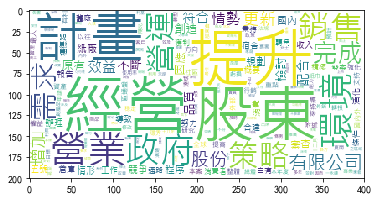

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('提升', 30),
 ('經營', 30),
 ('股東', 29),
 ('計畫', 27),
 ('營業', 25),
 ('環境', 25),
 ('政府', 24),
 ('銷售', 23),
 ('營運', 22),
 ('策略', 21)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfe8c390>,
 <a list of 10 Text xticklabel objects>)

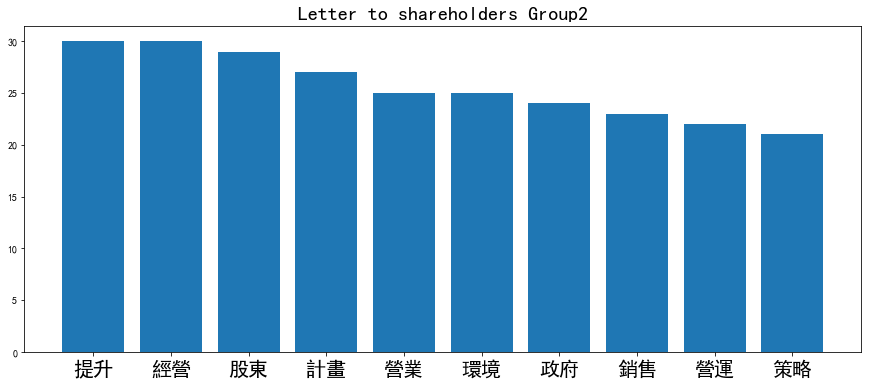

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group2",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.58191557,  0.5183728 ],
       [ 0.46049923, -0.49191068],
       [-0.1578855 , -0.30406422],
       [-0.43099094,  0.12290325],
       [-0.45353836,  0.15469884]])

No handles with labels found to put in legend.


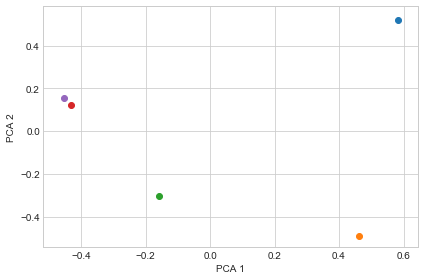

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

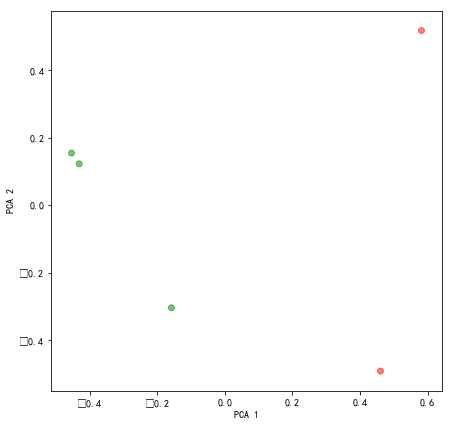

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()